# Spectogram Analysis on: whole readings / on one rotation

In [39]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft
import scipy.signal as signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Set Loading

In [3]:
def load_data(path):
    return pd.read_csv(path)

In [18]:
condition_type = 'normal_'
rotation_type = 'decreasing_'
trial_type = '1'
path_to_import = '../Bearing Vibration Data Under Time-Varying Rotational Speed Conditions/data_csv_downsample/'
path_to_export = 'spectogram_map_rotational_data_downsample_12k/'

file_name = condition_type + rotation_type + trial_type
input_file_name = path_to_import + file_name + '.csv'
save_path_name = path_to_export + file_name

In [19]:
current_data = load_data(input_file_name)

In [20]:
data = current_data.values[:, 0]

# SciPy

## FFT

In [21]:
#samples = data.shape[0]
samples = 2028 #data.shape[0] or a number (like 1622)
if samples == 2028:
    save_path_name = save_path_name + "_one_rotation"
else:
    save_path_name = save_path_name + "_all_data"

In [22]:
test_for_one_rotation = data[:samples]

In [23]:
test_for_one_rotation

array([ 0.00503519,  0.00963905, -0.01469563, ..., -0.0012129 ,
        0.00865251,  0.00503519])

In [24]:
y = abs(fft(test_for_one_rotation))

In [25]:
y.shape

(120000,)

In [26]:
window_size = 2048
sampling_rate = 12000
time_increment = sampling_rate / window_size
no_sample = test_for_one_rotation.shape[0]

print(time_increment)

5.859375


In [27]:
x = np.arange(no_sample) * time_increment

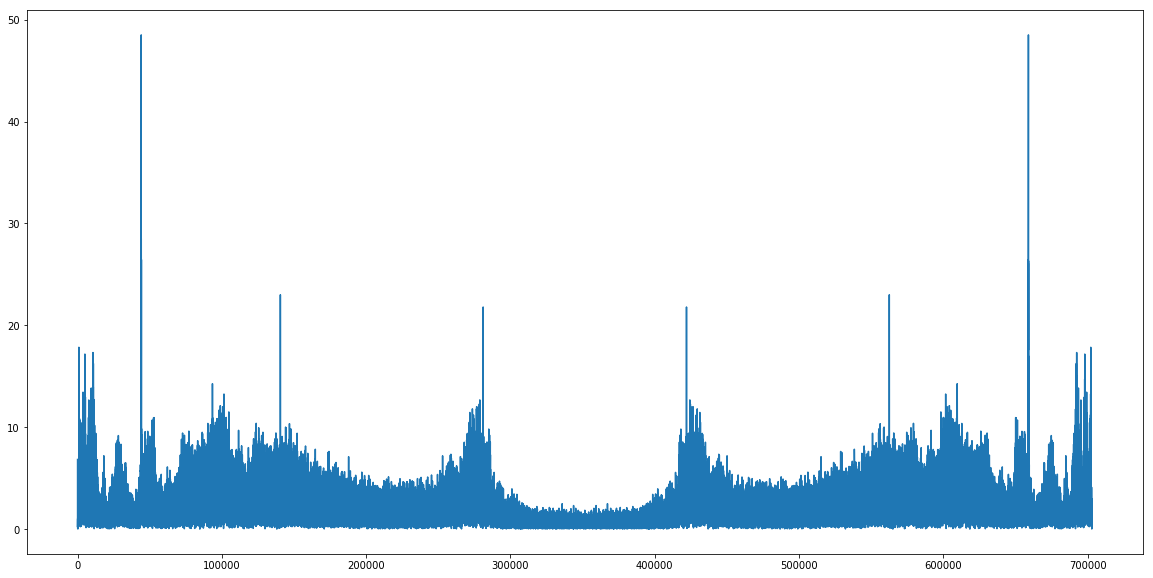

In [38]:
fig = plt.figure(figsize=(20,10))
plt.plot(x,y)

plt.show()

## STFT

In [29]:
fs = 12000
window_size = 2048
f, t, Zxx = signal.stft(test_for_one_rotation, fs, nperseg = window_size)

(1025, 119)


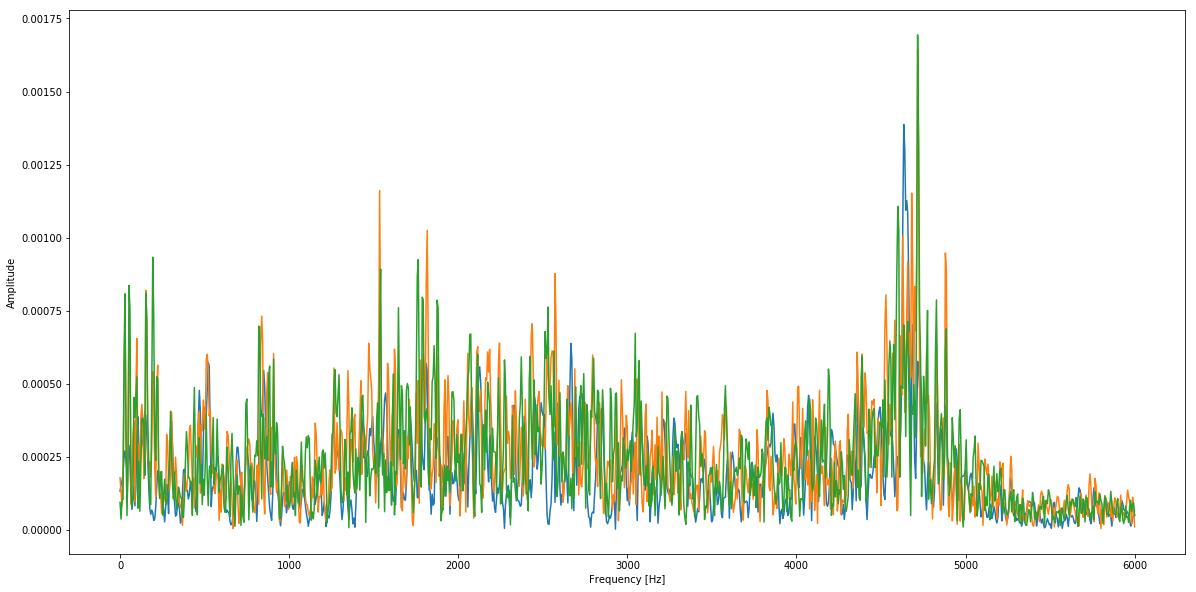

In [36]:
fig = plt.figure(figsize=(20,10))
plt.plot(f, np.abs(Zxx[: ,:3]))
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.savefig(save_path_name + "_stft.png")
print(Zxx.shape)

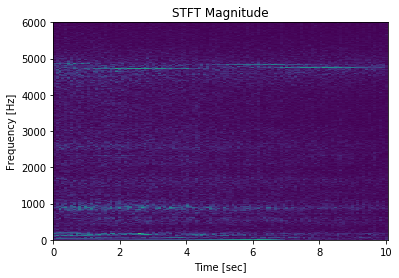

In [79]:
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig(save_path_name + "_signal_stft.png")

In [80]:
f, t, Sxx = signal.spectrogram(test_for_one_rotation, fs)

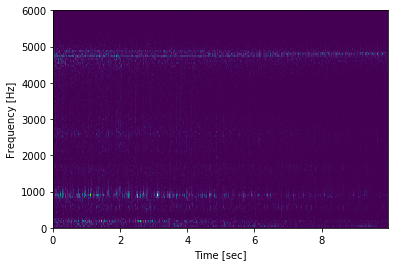

In [81]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig(save_path_name + "_signal_spectogram.png")

## PyPlot Spectogram

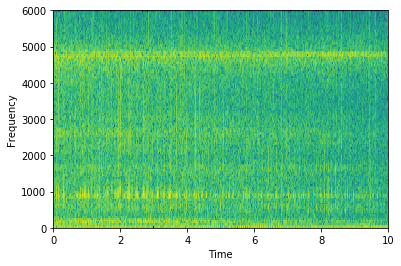

In [82]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(test_for_one_rotation, Fs=fs)
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.savefig(save_path_name + "_plt_spectrum.png")